# Project: Investigate a Dataset (Human Life Indicators - GapMinder Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
  In this project, we use the following datasets from GapMinder:
  * Global Human Population Data 
  * GDP Per Capita (PPP)
  * Human Life Expectancy
  * CO2 Emissions per Capita (tonnes per person)

All the datasets typically have the entries for most countries on the planet starting from 1800 till 2015. We will attempt to answer the following questions in this investigation.

    1.) What are the most populated countries on the planet in the year 2015?
    2.) How has the population of these 10 most populated countries varied from the year 1800 to 2015?
    3.) What are the top 10 countries with HIGHEST GDP Per Capita (in terms of PPP) and Life Expectancy in the year 2015?
    4.) How has the GDP of the Top 10 countries with highest GDP (in 2015) historically varied from the years 1800 - 2015?
    5.) How has the Life Expectancy of the Top 10 countries with highest Life Expectancy (in 2015) historically varied from  1800 - 2015?
    6.) What are the top 10 countries with LOWEST Life Expectancy and GDP Per Capita (in terms of PPP) in the year 2015?
    7.) Does Population Growth, CO2 Emissions or GDP per Capita have any impact on Life Expectancy?
    8.) Does Population Growth or CO2 Emissions have any association (correlation) with GDP per Capita?

In [1]:
# Use this cell to set up import statements for all of the packages that you plan to use.
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import locale
from locale import atof
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

In [2]:
## Setting the Numbering System to parse numeric values correctly
locale.setlocale(locale.LC_NUMERIC, '')

'English_India.1252'

<a id='wrangling'></a>
## Data Wrangling

For the sake of convenience all these datasets have been loaded in Google Drive and _published online_ and loaded here, so that they can be read
anywhere.
### General Properties

In [3]:
# Load your data and print out a few lines. 
# Perform operations to inspect data types and look for instances of missing or possibly errant data.

## Loading Global Population Data
url_globalpopulation = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSE6u7JrLhv5bL0oRLT6uTz4lImgNFWgKnGUClS_aQUWjGJIarnkXk1-6PPowCXYVYJ5bFLQffoueIw/pub?gid=744689735&single=true&output=csv'
df_pop = pd.read_csv(url_globalpopulation)
df_pop.head(5)

,Total population,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,3280000,3280000,3323519,3448982,3625022,3810047,3973968,4169690,4419695,...,25183615,25877544,26528741,27207291,27962207,28809167,29726803,30682500,31627506,32526562
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700,15700,15700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,"410,445",423591,438671,457234,478227,506889,552800,610036,672544,...,3050741,3010849,2968026,2929886,2901883,2886010,2880667,2883281,2889676,2896679
4,Algeria,"2,503,218",2595056,2713079,2880355,3082721,3299305,3536468,3811028,4143163,...,33749328,34261971,34811059,35401790,36036159,36717132,37439427,38186135,38934334,39666519


In [4]:
## Checking Null data count in all the columns
null_data = df_pop[df_pop.isnull().any(axis=1)]
null_data.count().sum()

1673

In [5]:
## Inspecting the datatypes of each column
#df_pop.info()

In [6]:
## Loading Global GDP Data
url_gdp = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQXZ04ASqgqO7zE69p77-6hRd2DnsG6KQex870QY4FaLank5kacjkMs-sK4bPtxNJV67teI52s3AwTh/pub?gid=687331503&single=true&output=csv'
df_gdp = pd.read_csv(url_gdp)
df_gdp.head(5)

,GDP per capita,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
4,Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0


In [7]:
## Checking Null data count in all the columns
null_data = df_gdp[df_gdp.isnull().any(axis=1)]
null_data.count().sum()

282

In [8]:
## Inspecting the datatypes of each column
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Columns: 217 entries, GDP per capita to 2015
dtypes: float64(216), object(1)
memory usage: 444.2+ KB


In [9]:
## Loading Global Life Expectancy Data
url_le = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRHH3S0ra1bkMCbifRHZPXjZWv6zxkGt4XEIp2jQD6cfIQcGrqC8uPP_u8zqVbxGHJX9lcyR_zwvrmM/pub?gid=384876835&single=true&output=csv'
df_le = pd.read_csv(url_le)
df_le.head(5)

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [10]:
## Checking Null data count in all the columns
null_data = df_le[df_le.isnull().any(axis=1)]
null_data.count().sum()

299

In [11]:
## Inspecting the datatypes of each column
df_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Columns: 218 entries, Life expectancy to 2016
dtypes: float64(217), object(1)
memory usage: 442.9+ KB


In [12]:
## Loading CO2 Emissions per Capita Data
url_co2 = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vS_cMkpqzl5UjSmtzQ0xoInDWlnSQemmhZ417M_5YuE1g_RNorUk1kkHrnRAvybUs0RLBmWTvIecWtT/pub?gid=0&single=true&output=csv'
df_co2 = pd.read_csv(url_co2)
df_co2.head()

,CO2 per capita,1751,1755,1762,1763,1764,1765,1766,1767,1768,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022704,0.027472,0.036780,0.047090,0.068312,0.131602,0.213325,0.262174,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.382066,1.332966,1.353789,1.224310,1.279420,1.297753,1.215055,1.336544,NaN,NaN
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.899236,2.762220,3.257010,3.113135,3.312875,3.328945,3.564361,3.480977,3.562504,3.785654


In [13]:
# Loading CO2 Emissions per Capita Data for year 2010, as we don't have data for 2015
co2_2010 = df_co2['2010']
# co2_2010
#Extracting CO2 Emissions per Capita for Switzerland
swiss_co2 = df_co2.set_index("CO2 per capita").loc['Switzerland']

In [14]:
## Checking Null data count in all the columns
null_data = df_co2[df_co2.isnull().any(axis=1)]
null_data.count().sum()

15053

In [15]:
## Inspecting the datatypes of each column
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Columns: 254 entries, CO2 per capita to 2012
dtypes: float64(253), object(1)
memory usage: 466.4+ KB


### Data Cleaning
In the earlier section we saw that the population dataset has a lot of mismatched datatype issues. The population values are not numeric. The other three datasets (GDP,CO2Emissions per Capita and Life Expectancy) seems relatively OK!</br>

In this section we will attempt to clean the loaded dataframes, such as:
* Removing NULL values
* Fixing Datatypes of columns correctly to handle numeric operations.

#### Cleaning the Population Dataset

In [16]:
## REMOVING NUll data for Population Data
df_pop = df_pop.dropna(axis = 0, how = 'any')
## Check Null data Again
df_pop.isnull().sum().any()

False

In [17]:
## Type Conversion of Data Values
country_names_df = df_pop[['Total population']]
country_names_df = country_names_df.astype(str)

## Selecting all the year columns
pop_df = df_pop.iloc[:, 1:]

## Converting obj type to int on all the year columns
pop_df = pop_df.applymap(atof).astype(int)

In [18]:
## Merging two dataframes
pop_new_df = pd.concat([country_names_df,pop_df], axis = 1, join_axes = [country_names_df.index])
## Renaming First Column to 'Country Names'
pop_new_df.rename(columns = {'Total population':'CountryNames'}, inplace=True)
pop_new_df.head()

,CountryNames,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1,Afghanistan,3280000,3280000,3323519,3448982,3625022,3810047,3973968,4169690,4419695,...,25183615,25877544,26528741,27207291,27962207,28809167,29726803,30682500,31627506,32526562
3,Albania,410445,423591,438671,457234,478227,506889,552800,610036,672544,...,3050741,3010849,2968026,2929886,2901883,2886010,2880667,2883281,2889676,2896679
4,Algeria,2503218,2595056,2713079,2880355,3082721,3299305,3536468,3811028,4143163,...,33749328,34261971,34811059,35401790,36036159,36717132,37439427,38186135,38934334,39666519
5,American Samoa,8170,8156,8142,8128,8114,7958,7564,7057,6582,...,58648,57904,57031,56226,55636,55316,55227,55302,55434,55538
6,Andorra,2654,2654,2700,2835,3026,3230,3436,3654,3885,...,83373,84878,85616,85474,84419,82326,79316,75902,72786,70473


In [19]:
#Extracting Population Data for Switzerland
swiss_pop = pop_new_df.set_index("CountryNames").loc['Switzerland']
#Extracting Global Population Data for year 2015
pop_2015 = pop_new_df['2015']
#Extracting Global Population Data for year 2010
pop_2010 = pop_new_df['2010']

#### Cleaning the GDP Dataset

In [20]:
## REMOVING NUll data in GDP Dataset
df_gdp = df_gdp.dropna(axis = 0, how = 'any').reset_index(drop=True)
## Checking Null data count in all the columns
df_gdp.isnull().sum().any()

False

In [21]:
## Type Conversion of Data Values
country_names_df = df_gdp[['GDP per capita']]
country_names_df1 = country_names_df.astype(str)
## Merging two dataframes
df_gdp = pd.concat([country_names_df1,df_gdp.iloc[:, 1:]], axis = 1, join_axes = [country_names_df1.index])
df_gdp.head()

,GDP per capita,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
1,Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
2,Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0
3,Andorra,1197.0,1199.0,1201.0,1204.0,1206.0,1208.0,1210.0,1212.0,1215.0,...,42738.0,43442.0,41426.0,41735.0,38982.0,41958.0,41926.0,43735.0,44929.0,46577.0
4,Angola,618.0,620.0,623.0,626.0,628.0,631.0,634.0,637.0,640.0,...,5445.0,6453.0,7103.0,7039.0,7047.0,7094.0,7230.0,7488.0,7546.0,7615.0


In [22]:
# We are extracting the GDP data for India into a Pandas dataframe just for comparison later on
india_gdp = df_gdp.set_index("GDP per capita").loc['India']
# We are extracting the GDP data for Switzerland into a separate dataframe
swiss_gdp = df_gdp.set_index("GDP per capita").loc['Switzerland']
#Extracting Global GDP Data for year 2010
gdp_2010 = df_gdp['2010']
#Extracting Global GDP Data for year 2015
gdp_2015 = df_gdp['2015']

#### Cleaning the Life Expectancy Dataset

In [23]:
## REMOVING NUll data in GDP Dataset
df_le = df_le.dropna(axis = 0, how = 'any').reset_index(drop=True)
## Checking Null data count in all the columns
df_le.isnull().sum().any()

False

In [24]:
## Type Conversion of Data Values
country_names_df = df_le[['Life expectancy']]
country_names_df2 = country_names_df.astype(str)
## Merging two dataframes
df_le = pd.concat([country_names_df2,df_le.iloc[:, 1:]], axis = 1, join_axes = [country_names_df2.index])
df_le.head()

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
1,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
2,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50
3,Angola,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,...,56.2,56.7,57.1,57.6,58.1,58.5,58.8,59.2,59.6,60.00
4,Antigua and Barbuda,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,...,75.3,75.5,75.7,75.8,75.9,76.1,76.2,76.3,76.4,76.50


In [25]:
# We are extracting the LifeExpectancy data for India
india_le = df_le.set_index("Life expectancy").loc['India']
# We are extracting the LifeExpectancy data for Switzerland
swiss_le = df_le.set_index("Life expectancy").loc['Switzerland']
#Extracting Life Expectancy Data for year 2010
le_2010 = df_le['2010']
#Extracting Life Expectancy Data for year 2015
le_2015 = df_le['2015']

#### Cleaning the CO2 Emissions per Capita Dataset

In [26]:
## REMOVING NUll data in CO2 Emissions Dataset
df_co2 = df_co2.dropna(axis = 0, how = 'any').reset_index(drop=True)
## Checking Null data count in all the columns
df_co2.isnull().sum().any()

False

<h3 align="center">Creating Custom DataFrames for Bi-variate Analysis</h3> 

In [27]:
# Combining global population, GDP and LifeExp data for year 2015 into one dataframe
df_all_2015 = pd.concat([pop_2015,gdp_2015,le_2015], axis = 1, join_axes = [gdp_2015.index])
df_all_2015.columns = ['GlobalPopulation(2015)','GlobalGDPperCapita(2015)','GlobalLifeExpectancy(2015)']

In [28]:
df_all_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 3 columns):
GlobalPopulation(2015)        182 non-null float64
GlobalGDPperCapita(2015)      201 non-null float64
GlobalLifeExpectancy(2015)    201 non-null float64
dtypes: float64(3)
memory usage: 4.8 KB


In [29]:
## Fixing Missing Values NaN in the df_all_2015 dataset
pop2015_mean = df_all_2015['GlobalPopulation(2015)'].mean()
pop2015_mean = float("{0:.2f}".format(pop2015_mean))
df_all_2015.iloc[:,0].fillna(pop2015_mean,inplace=True)
df_all_2015.head()

,GlobalPopulation(2015),GlobalGDPperCapita(2015),GlobalLifeExpectancy(2015)
0,33767469.14,1925.0,53.8
1,32526562.00,10620.0,78.0
2,33767469.14,13434.0,76.4
3,2896679.00,46577.0,59.6
4,39666519.00,7615.0,76.4


In [30]:
# Checking DataFrame after Filling Missing Data with MEAN of respective cols
df_all_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 3 columns):
GlobalPopulation(2015)        201 non-null float64
GlobalGDPperCapita(2015)      201 non-null float64
GlobalLifeExpectancy(2015)    201 non-null float64
dtypes: float64(3)
memory usage: 4.8 KB


In [31]:
# Combining global population, GDP, LifeExp and CO2Emissions per Capita data for year 2010 into one dataframe
df_all_2010 = pd.concat([pop_2010,gdp_2010,le_2010,co2_2010], axis = 1, join_axes = [gdp_2015.index])
df_all_2010.columns = ['GlobalPopulation(2010)','GlobalGDPperCapita(2010)','GlobalLifeExpectancy(2010)','GlobalCO2EmissionsPerCapita(2010)']

In [32]:
df_all_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
GlobalPopulation(2010)               182 non-null float64
GlobalGDPperCapita(2010)             201 non-null float64
GlobalLifeExpectancy(2010)           201 non-null float64
GlobalCO2EmissionsPerCapita(2010)    174 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [33]:
## Fixing Missing Values NaN in the df_all_2010 dataset
pop2010_mean = df_all_2010['GlobalPopulation(2010)'].mean()
pop2010_mean = float("{0:.2f}".format(pop2010_mean))
df_all_2010.iloc[:,0].fillna(pop2010_mean,inplace=True)
co2010_mean = df_all_2010['GlobalCO2EmissionsPerCapita(2010)'].mean()
co2010_mean = float("{0:.2f}".format(co2010_mean))
df_all_2010.iloc[:,3].fillna(co2010_mean,inplace=True)
df_all_2010.head()

,GlobalPopulation(2010),GlobalGDPperCapita(2010),GlobalLifeExpectancy(2010),GlobalCO2EmissionsPerCapita(2010)
0,31824857.9,1637.0,53.6,5.130000
1,27962207.0,9374.0,77.2,0.262174
2,31824857.9,12494.0,76.0,5.130000
3,2901883.0,38982.0,57.6,1.336544
4,36036159.0,7047.0,75.8,3.480977


In [34]:
# Checking DataFrame after Filling Missing Data with MEAN of respective cols
df_all_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
GlobalPopulation(2010)               201 non-null float64
GlobalGDPperCapita(2010)             201 non-null float64
GlobalLifeExpectancy(2010)           201 non-null float64
GlobalCO2EmissionsPerCapita(2010)    201 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [35]:
# Combining global population, GDP, LifeExp and CO2Emissions per Capita data for Switzerland into one dataframe
swiss_all = pd.concat([swiss_pop,swiss_gdp,swiss_le,swiss_co2], axis = 1, join_axes = [swiss_le.index])
swiss_all.columns = ['SwissPopulation','SwissGDPperCapita','SwissLifeExpectancy','SwissCO2perCapita']

In [36]:
swiss_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, 1800 to 2016
Data columns (total 4 columns):
SwissPopulation        81 non-null float64
SwissGDPperCapita      216 non-null float64
SwissLifeExpectancy    217 non-null float64
SwissCO2perCapita      155 non-null float64
dtypes: float64(4)
memory usage: 8.5+ KB


In [37]:
# Filling Missing NaNs in SwissPopulation Column with mean of the same column
swisspop_mean = swiss_all['SwissPopulation'].mean()
swisspop_mean = float("{0:.2f}".format(swisspop_mean)) # Rounding Off mean to decimal places
swiss_all.iloc[:,0].fillna(swisspop_mean,inplace=True)
# Filling Missing NaNs in SwissGDPperCapita Column with mean of the same column
swissgdp_mean = swiss_all['SwissGDPperCapita'].mean()
swissgdp_mean = float("{0:.2f}".format(swissgdp_mean)) # Rounding Off mean to decimal places
swiss_all.iloc[:,1].fillna(swissgdp_mean,inplace=True)
# Filling Missing NaNs in SwissCO2perCapita Column with mean of the same column
swissco2_mean = swiss_all['SwissCO2perCapita'].mean()
swissco2_mean = float("{0:.2f}".format(swissco2_mean)) # Rounding Off mean to decimal places
swiss_all.iloc[:,3].fillna(swissco2_mean,inplace=True)
swiss_all.head()

,SwissPopulation,SwissGDPperCapita,SwissLifeExpectancy,SwissCO2perCapita
1800,1826051.00,2701.0,38.0,2.96
1801,5787435.31,2701.0,38.0,2.96
1802,5787435.31,2702.0,38.0,2.96
1803,5787435.31,2702.0,38.0,2.96
1804,5787435.31,2703.0,38.0,2.96


In [38]:
# Checking DataFrame after Filling Missing Data with MEAN of respective cols
swiss_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, 1800 to 2016
Data columns (total 4 columns):
SwissPopulation        217 non-null float64
SwissGDPperCapita      217 non-null float64
SwissLifeExpectancy    217 non-null float64
SwissCO2perCapita      217 non-null float64
dtypes: float64(4)
memory usage: 8.5+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> **Info**: Here we will Compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section.

<h3 align="center">1-D Analysis of Data (Distribution Plots) </h3>
> **KDE Plot**:  *[Kernel density estimation](https://chemicalstatistician.wordpress.com/2013/06/09/exploratory-data-analysis-kernel-density-estimation-in-r-on-ozone-pollution-data-in-new-york-and-ozonopolis/) is a fundamental data smoothing problem where inferences about the data population are made, based on a finite data sample. A kernel is a special type of probability density function (PDF).*


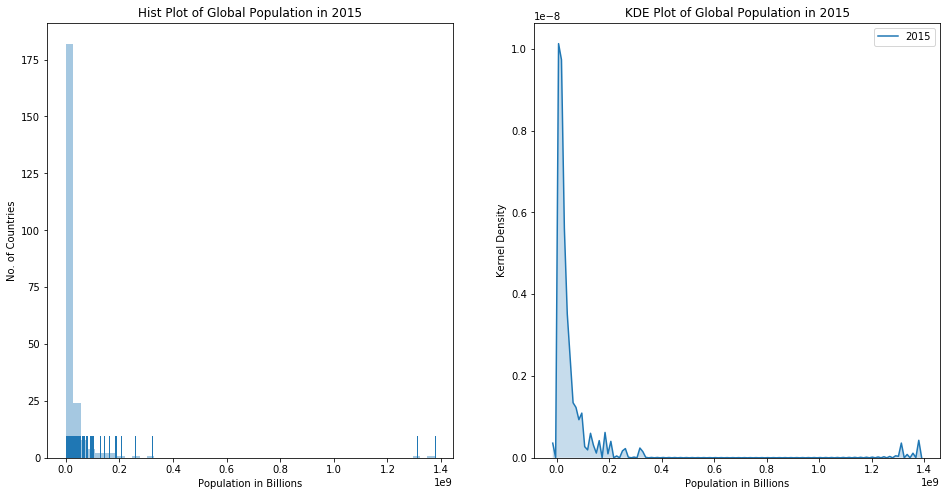

In [39]:
## Plotting 1D Distribution of Population Data for 2015
x = pop_new_df['2015']
# call regplot on each axes
fig, (ax1, ax2) = plt.subplots(figsize=(16,8),ncols=2)
ax = sns.distplot(x, kde=False, rug=True, ax = ax1);
ax.set(xlabel='Population in Billions', ylabel='No. of Countries',title = 'Hist Plot of Global Population in 2015')
ax = sns.kdeplot(x, shade=True, ax = ax2);
ax.set(xlabel='Population in Billions', ylabel='Kernel Density',title = 'KDE Plot of Global Population in 2015')

#### Note:
It appears more than 80% of the countries on the planet have a population ranging from a few million to few hundred million.

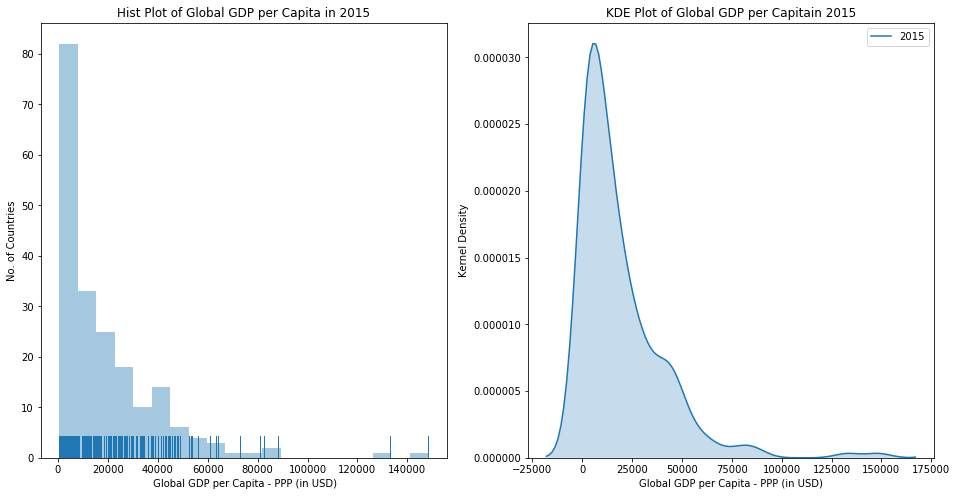

In [40]:
## Plotting 1D Distribution of Global GDP Per Capita Data for 2015
x = df_gdp['2015']
# call regplot on each axes
fig, (ax1, ax2) = plt.subplots(figsize=(16,8),ncols=2)
ax = sns.distplot(x, kde=False, rug=True, ax = ax1);
ax.set(xlabel=' Global GDP per Capita - PPP (in USD)', ylabel='No. of Countries',title = 'Hist Plot of Global GDP per Capita in 2015')
ax = sns.kdeplot(x, shade=True, ax = ax2);
ax.set(xlabel='Global GDP per Capita - PPP (in USD)', ylabel='Kernel Density',title = 'KDE Plot of Global GDP per Capitain 2015')

In [41]:
# Computing Mean GDP per Capita
print("Average Global GDP per Capita (USD) for 2015: ",x.mean())

Average Global GDP per Capita (USD) for 2015:  19015.3930348


The GDP per Capita - PPP (in USD) of atleast half the countries on the planet seem to be less than 20,000 USD per annum. </br>

Or in other words, the Global average GDP per Capita (in USD) in 2015 seems to be around 19,015 USD per annum.

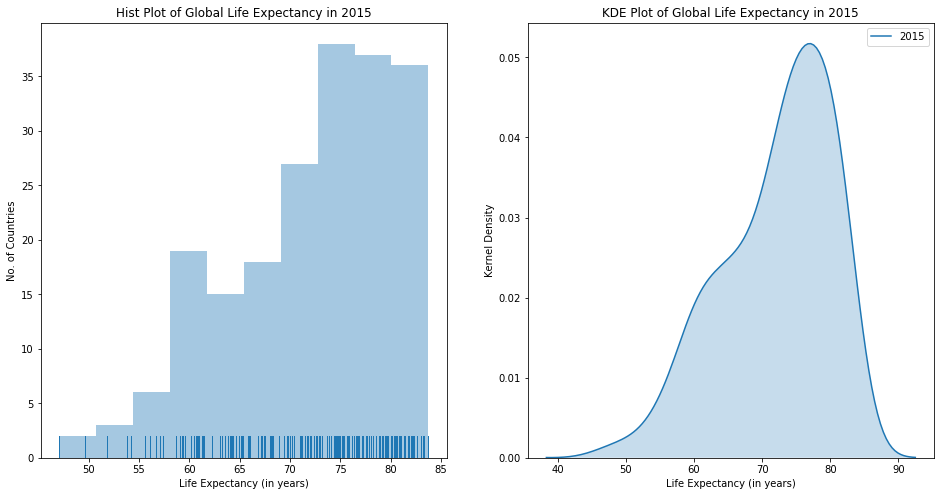

In [42]:
## Plotting 1D Distribution of Global Life Expectancy Data for 2015
x = df_le['2015']
# call regplot on each axes
fig, (ax1, ax2) = plt.subplots(figsize=(16,8),ncols=2)
ax = sns.distplot(x, kde=False, rug=True, ax = ax1);
ax.set(xlabel='Life Expectancy (in years)', ylabel='No. of Countries',title = 'Hist Plot of Global Life Expectancy in 2015')
ax = sns.kdeplot(x, shade=True, ax = ax2);
ax.set(xlabel='Life Expectancy (in years)', ylabel='Kernel Density',title = 'KDE Plot of Global Life Expectancy in 2015')

In [43]:
# Computing Mean Life Expectancy
print("Average Life Expectancy (human years) for 2015: ",x.mean())

Average Life Expectancy (human years) for 2015:  72.1878606965


Average Life Expectancy for a human being on the planet in the year 2015 is around ** 72 years**

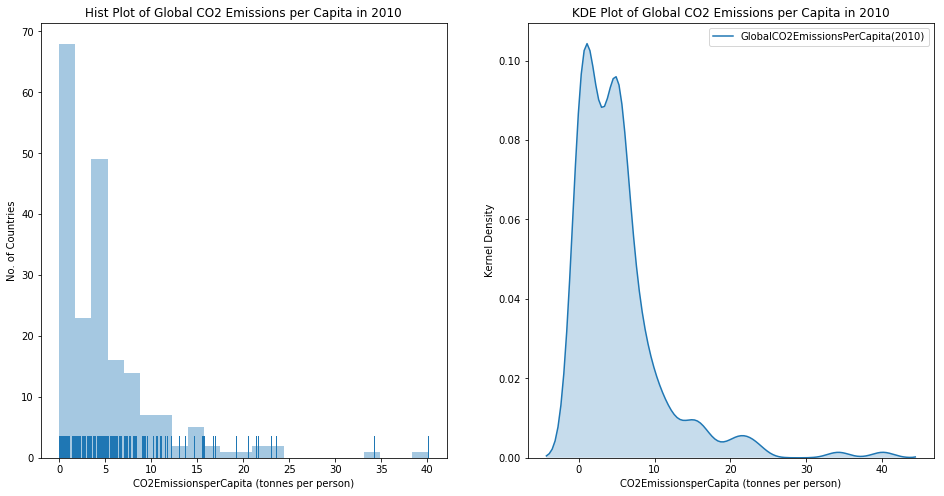

In [44]:
## Plotting 1D Distribution of Global CO2 Emissions per Capita for 2010
x = df_all_2010['GlobalCO2EmissionsPerCapita(2010)']
# call regplot on each axes
fig, (ax1, ax2) = plt.subplots(figsize=(16,8),ncols=2)
ax = sns.distplot(x, kde=False, rug=True, ax = ax1);
ax.set(xlabel='CO2EmissionsperCapita (tonnes per person)', ylabel='No. of Countries',title = 'Hist Plot of Global CO2 Emissions per Capita in 2010')
ax = sns.kdeplot(x, shade=True, ax = ax2);
ax.set(xlabel='CO2EmissionsperCapita (tonnes per person)', ylabel='Kernel Density',title = 'KDE Plot of Global CO2 Emissions per Capita in 2010')

In [45]:
# Computing Mean CO2 Emissions per Capita
print("Average CO2 Emissions per Capita (tonnes per person) for 2010: ",x.mean())

Average CO2 Emissions per Capita (tonnes per person) for 2010:  5.12856821351


#### Note
On an average, a human being on the planet seems to be emitting about 5 tonnes of CO2 per year doing his various day to day activities. Of course this is 7 year old data, this figure may well have increase in 2017

### Q1.) What are the 10 most populated countries on the planet in the year 2015?

In [46]:
## Selecting top 10 countries with highest population in 2015
pop_10large = pop_new_df.nlargest(10,'2015').reset_index(drop=True)
pop_10large[['CountryNames','2015']]

,CountryNames,2015
0,China,1376048943
1,India,1311050527
2,United States,321773631
3,Indonesia,257563815
4,Brazil,207847528
5,Pakistan,188924874
6,Nigeria,182201962
7,Bangladesh,160995642
8,Russia,143456918
9,Mexico,127017224


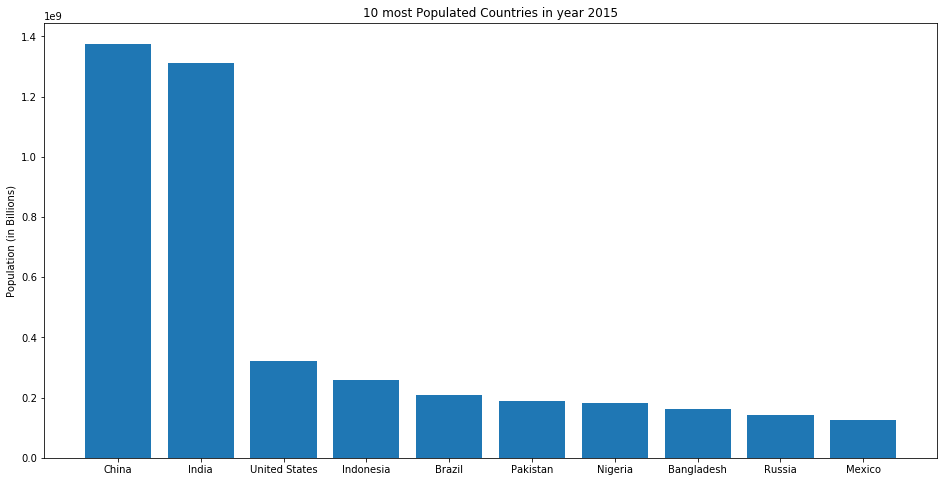

In [47]:
## Bar Plots of Top 10 most populated countries in year 2015
plt.figure(figsize=(16,8))
locations =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
countries = pop_10large['CountryNames']
pop_2015 = pop_10large['2015']
plt.bar(locations, pop_2015, tick_label = countries)
plt.title('10 most Populated Countries in year 2015')
plt.ylabel('Population (in Billions)')

**China** and **India** are the most populated countries on the planet now with population of ~ 1.3 billion in each country.

### Q2.) How has the population of these 10 most populated countries varied from the year 1800 to 2015?

> **Info**: Here we will see how the population of the above 10 countries has varied historically over the last two centuries.

In [48]:
## Extract all the collumn of years from 1800 to 2015 as a list
years = list(pop_10large.iloc[:,1:])
## Convert this list to int datatype
years = pd.to_numeric(years, downcast='integer')

In [49]:
## Transposing the DataFrame
pop10_df = pop_10large.set_index('CountryNames').T
pop10_df['Years'] = years # Adding the Years as a new column for plotting easily
cols = pop10_df.columns.tolist()
cols = cols[-1:] + cols[:-1] # Reordering the Columns and making 'Years' appear First
pop10_df = pop10_df[cols]
pop10_df = pop10_df.reset_index(drop=True) # Resetting the index
# pop10_df.index.names = ['Index']
pop10_df.head(5)

CountryNames,Years,China,India,United States,Indonesia,Brazil,Pakistan,Nigeria,Bangladesh,Russia,Mexico
0,1800,321675013,168574895,6801854,16108545,3639636,13123633,12100855,19227358,31088398,6181708
1,1810,350542958,171940819,8294928,16537268,4058652,13385672,12100855,19611269,31088398,6382317
2,1820,380055273,176225709,10361646,17236636,4582325,13699962,12238319,20122865,31861526,6621314
3,1830,402373519,182214537,13480460,18460171,5301068,14110059,12633330,20872777,34134430,6930661
4,1840,411213424,189298397,17942443,20052305,6206694,14581666,13184823,21776468,37420913,7288858


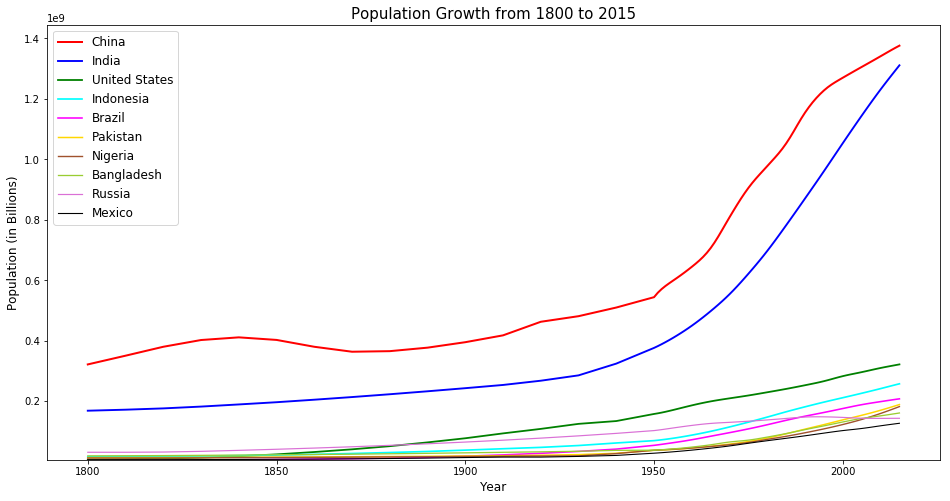

In [50]:
## Making Line Plot of Population Growth for these 10 Countries
plt.figure(figsize=(16,8))
zorder = 1 # z-order sets the first plot on the bottom
colors = ['red','blue','green','cyan','magenta','gold','sienna','yellowgreen','orchid','black']
linewidth = 2

for country,color in zip(countries,colors):
    plt.plot(years,pop10_df[country], linewidth=linewidth, color=color, label=country, zorder=zorder)
    zorder += 1
    linewidth -= 0.1


l = plt.legend(fontsize=12)
l.set_zorder(11)  # put the legend on top
# Set Plot title and Axis Labels
plt.xlabel('Year',fontsize=12)
plt.ylabel('Population (in Billions)',fontsize=12)
plt.title('Population Growth from 1800 to 2015',fontsize=15)
plt.ylim(min(pop10_df['Mexico']), None)
plt.show()

Historically speaking, it appears that **China** and **India** had the most population even 2 centuries ago. 
Some countries have a very small population (or _close to zero_ ) in the early 19th century either because they did not exist at that time or because their demographics and borders were different 200 years ago, compared to the present.

### Q3.) What are the top 10 countries with HIGHEST GDP Per Capita (in terms of PPP) and Life Expectancy in the year 2015?
> **Info**: Here we will see what are the top 10 countries with highest GDP and Life Expectancy for the year 2015

In [51]:
## Computing Top 10 Countries with HIGHEST Life Expectancy and GDP
df_gdp_10large = df_gdp.nlargest(10,'2015').reset_index(drop=True)
df_le_10large = df_le.nlargest(10,'2015').reset_index(drop=True)
# Merging the 2 DataFrames
df_large_2015 = pd.concat([df_gdp_10large[['GDP per capita','2015']],df_le_10large[['Life expectancy','2015']]], axis = 1)
df_large_2015.columns = ['GDP per Capita (Highest10)','GDP(2015)','Life Expectancy (Highest10)','LE(2015)']
df_large_2015

,GDP per Capita (Highest10),GDP(2015),Life Expectancy (Highest10),LE(2015)
0,"Macao, China",148374.0,"Hong Kong, China",83.73
1,Qatar,132877.0,Iceland,83.30
2,Luxembourg,88314.0,Japan,83.20
3,Kuwait,82633.0,Switzerland,83.00
4,Singapore,80794.0,Spain,82.60
5,Brunei,73003.0,Australia,82.30
6,Norway,64304.0,Italy,82.20
7,Monaco,63472.0,Luxembourg,82.20
8,United Arab Emirates,60749.0,Israel,82.10
9,Switzerland,56118.0,Malta,82.10


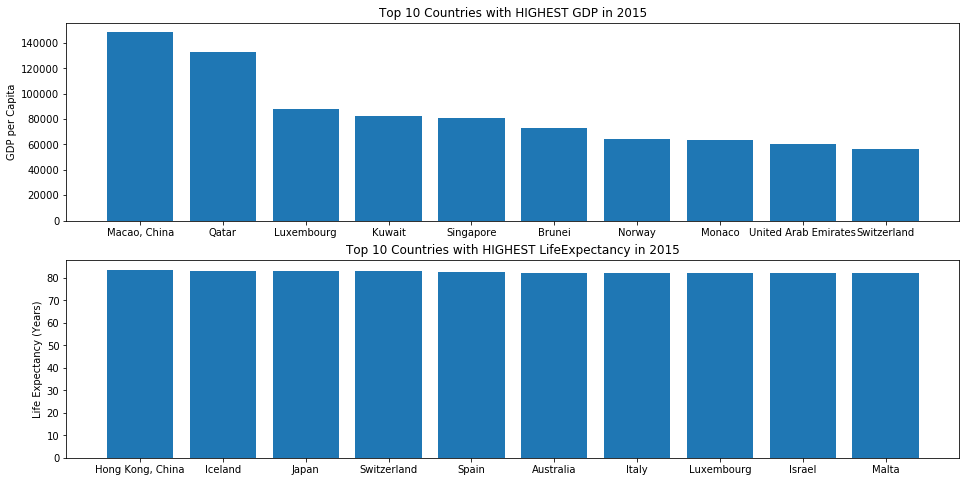

In [52]:
## Bar Plots of Top 10 countries with highest GDP and Life Expectancy in year 2015
f, axarr = plt.subplots(2,figsize=(16,8))
locations =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
countries_gdp = df_large_2015['GDP per Capita (Highest10)']
gdp = df_large_2015['GDP(2015)']
axarr[0].bar(locations, gdp,tick_label = countries_gdp)
axarr[0].set_title('Top 10 Countries with HIGHEST GDP in 2015')
axarr[0].set_ylabel('GDP per Capita')
countries_le = df_large_2015['Life Expectancy (Highest10)']
le = df_large_2015['LE(2015)']
axarr[1].bar(locations, le,tick_label = countries_le)
axarr[1].set_title('Top 10 Countries with HIGHEST LifeExpectancy in 2015')
axarr[1].set_ylabel('Life Expectancy (Years)')

In [53]:
#Assigning to new variable for later use in for-loop for plotting multi-line plots
countries_gdptop10 = countries_gdp 
countries_letop10 = countries_le

Apparently Switzerland is the only country that appears in the Top 10 list for GDP Per Capita and Life Expectancy.
Humans in the top 10 (Life Expectancy) Countries seem to be living past 80 years on average.

### Q4.)  How has the GDP of the Top 10 countries with highest GDP (in 2015) historically varied from the years 1800 - 2015?

In [54]:
## Transposing the DataFrame for GDP
gdp_top10 = df_gdp_10large.set_index('GDP per capita').T
years = list(df_gdp_10large.iloc[:,1:])
## Convert this list to int datatype
years = pd.to_numeric(years, downcast='integer')
gdp_top10['Years'] = years # Adding the Years as a new column for plotting easily
cols = gdp_top10.columns.tolist()
cols = cols[-1:] + cols[:-1] # Reordering the Columns and making 'Years' appear First
gdp_top10 = gdp_top10[cols]
gdp_top10 = gdp_top10.reset_index(drop=True) # Resetting the index
# gdp_top10.index.names = ['Index']
gdp_top10.head()

GDP per capita,Years,"Macao, China",Qatar,Luxembourg,Kuwait,Singapore,Brunei,Norway,Monaco,United Arab Emirates,Switzerland
0,1800,992.0,1097.0,1453.0,1097.0,1021.0,1512.0,1278.0,1948.0,998.0,2701.0
1,1801,992.0,1101.0,1453.0,1101.0,1021.0,1512.0,1280.0,1950.0,1001.0,2701.0
2,1802,993.0,1105.0,1453.0,1105.0,1022.0,1512.0,1282.0,1953.0,1005.0,2702.0
3,1803,993.0,1110.0,1453.0,1110.0,1022.0,1513.0,1284.0,1955.0,1009.0,2702.0
4,1804,993.0,1114.0,1454.0,1114.0,1022.0,1513.0,1286.0,1958.0,1013.0,2703.0


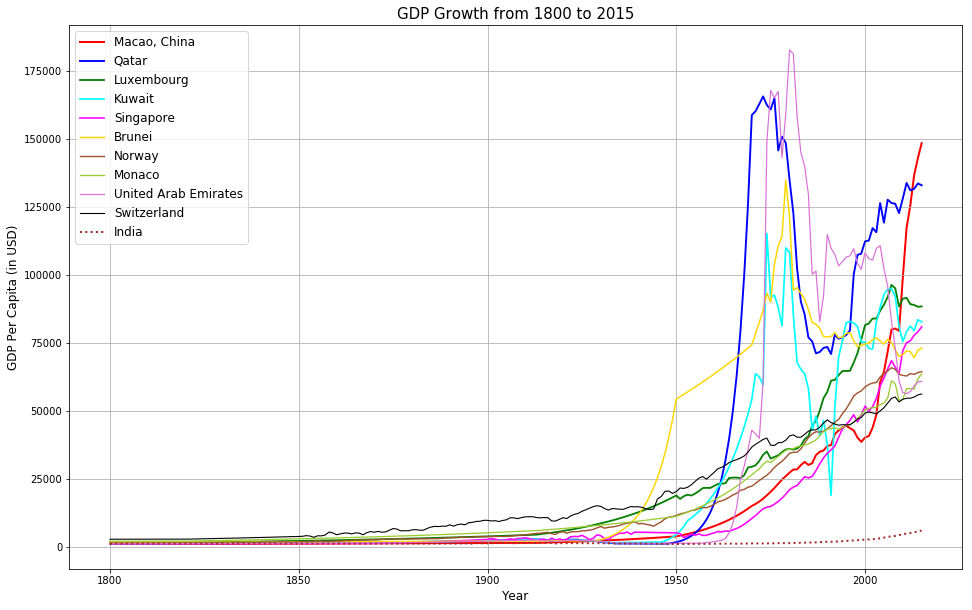

In [55]:
## Making Line Plots of GDP Growth for these Top 10 Countries
plt.figure(figsize=(16,10))
zorder = 1 # z-order sets the first plot on the bottom
colors = ['red','blue','green','cyan','magenta','gold','sienna','yellowgreen','orchid','black']
linewidth = 2

for country,color in zip(countries_gdptop10,colors):
    plt.plot(years,gdp_top10[country], linewidth=linewidth, color=color, label=country, zorder=zorder)
    zorder += 1
    linewidth -= 0.1
# Manually added India also to the plot to see it's GDP per Capita from the 18th century
plt.plot(years,india_gdp, linewidth=2, linestyle=':', color='brown', label='India', zorder=11)
l = plt.legend(fontsize=12)
l.set_zorder(12)  # put the legend on top
# Set Plot title and Axis Labels
plt.xlabel('Year',fontsize=12)
plt.ylabel('GDP Per Capita (in USD)',fontsize=12)
plt.title('GDP Growth from 1800 to 2015',fontsize=15)
plt.grid(True)
plt.show()

* The GDP per Capita (in terms of Purchasing Power Parity) of **Qatar** has seen massive growth after 1950, probably due to the discovery of oil resources. 
* GDP per capita of *(Macao)China* and *Singapore* also has grown by leaps and bounds after 1950 because of its industrial revolution and globalization.
* India which was once said to be the top country in GDP per capita a millenia ago appears to be at the bottom most in the chart even in the 18th century, probably because of violent invasions and colonizations!

### Q5.)  How has the Life Expectancy of the Top 10 countries with highest Life Expectancy (in 2015) historically varied from 1800 - 2015?

In [56]:
## Transposing the DataFrame for Life Expectancy
le_top10 = df_le_10large.set_index('Life expectancy').T
years = list(df_le_10large.iloc[:,1:])
## Convert this list to int datatype
years = pd.to_numeric(years, downcast='integer')
le_top10['Years'] = years # Adding the Years as a new column for plotting easily
cols = le_top10.columns.tolist()
cols = cols[-1:] + cols[:-1] # Reordering the Columns and making 'Years' appear First
le_top10 = le_top10[cols]
le_top10 = le_top10.reset_index(drop=True) # Resetting the index
le_top10.head()

Life expectancy,Years,"Hong Kong, China",Iceland,Japan,Switzerland,Spain,Australia,Italy,Luxembourg,Israel,Malta
0,1800,34.9,42.85,36.4,38.0,29.5,34.05,29.69,36.9,32.0,28.7
1,1801,34.9,33.88,36.4,38.0,29.5,34.05,29.69,36.9,32.0,28.7
2,1802,34.9,27.62,36.4,38.0,29.5,34.05,29.69,36.9,32.0,28.7
3,1803,34.9,19.60,36.4,38.0,29.5,34.05,29.69,36.9,32.0,28.7
4,1804,34.9,24.76,36.4,38.0,29.5,34.05,29.69,36.9,32.0,28.7


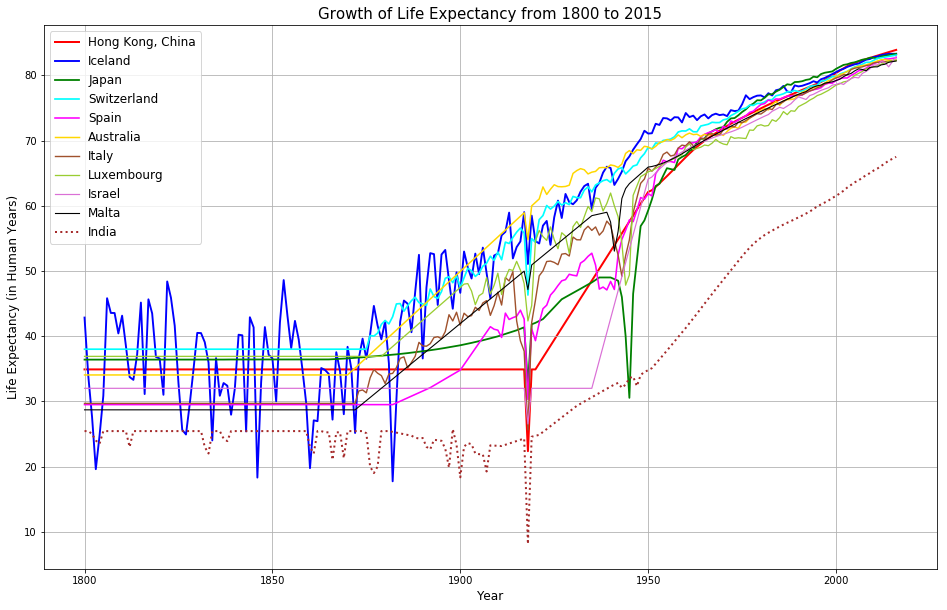

In [57]:
## Making Line Plot of Line Expectancy for these Top 10 Countries
plt.figure(figsize=(16,10))
zorder = 1 # z-order sets the first plot on the bottom
colors = ['red','blue','green','cyan','magenta','gold','sienna','yellowgreen','orchid','black']
linewidth = 2

for country,color in zip(countries_letop10,colors):
    plt.plot(years,le_top10[country], linewidth=linewidth, color=color, label=country, zorder=zorder)
    zorder += 1
    linewidth -= 0.1

# Manually added India also to the plot to see its Life expectancy growth from the 18th century
plt.plot(years,india_le, linewidth=2, linestyle=':', color='brown', label='India', zorder=11)
l = plt.legend(fontsize=12)
l.set_zorder(12)  # put the legend on top
# Set Plot title and Axis Labels
plt.xlabel('Year',fontsize=12)
plt.ylabel('Life Expectancy (in Human Years)',fontsize=12)
plt.title('Growth of Life Expectancy from 1800 to 2015',fontsize=15)
plt.grid(True)
plt.show()

* The Life Expectancy of **Iceland** appears to have a very erratic distribution atlest till 1940, it is unclear to deduce what factors lead to life expectancy of Iceland being so tumultous from 1800 to 1950.
* Many countries like *(Hong Kong) China*, *Spain* and *India* see a big slump in Life Expectancy around the time of the First World War. 
* *Luxembourg* sees a big slump in Life Expectancy  during the 2nd World War. 
* One can surmise that other factors like the ['*Bengal Famine*'](https://yourstory.com/2014/08/bengal-famine-genocide/) may have also contributed to India's slump in Life Expectancy in the early 20th century.
* In recent times Life expectancy of an indian citizen has grown nicely and is approaching 70 years now.

### Q6.) What are the top 10 countries with LOWEST Life Expectancy and GDP Per Capita (in terms of PPP) in the year 2015?

In [58]:
## Computing Bottom 10 Countries with LOWEST Life Expectancy and GDP
df_gdp_10small = df_gdp.nsmallest(10,'2015').reset_index(drop=True)
# df_gdp_10small[['GDP per capita','2015']]
df_le_10small = df_le.nsmallest(10,'2015').reset_index(drop=True)
#df_le_10small[['Life expectancy','2015']]
df_small_2015 = pd.concat([df_gdp_10small[['GDP per capita','2015']],df_le_10small[['Life expectancy','2015']]], axis = 1)
df_small_2015.columns = ['GDP per Capita (Lowest10)','GDP(2015)','Life Expectancy (Lowest10)','LE(2015)']
df_small_2015

,GDP per Capita (Lowest10),GDP(2015),Life Expectancy (Lowest10),LE(2015)
0,Central African Republic,599.0,Lesotho,47.1
1,Somalia,624.0,Central African Republic,49.6
2,Burundi,777.0,Swaziland,51.8
3,Malawi,799.0,Afghanistan,53.8
4,"Congo, Dem. Rep.",809.0,Somalia,54.2
5,Niger,943.0,Guinea-Bissau,55.6
6,Liberia,958.0,South Sudan,56.1
7,Eritrea,1129.0,Zambia,56.7
8,Mozambique,1176.0,Mozambique,57.1
9,Guinea,1225.0,Sierra Leone,57.1


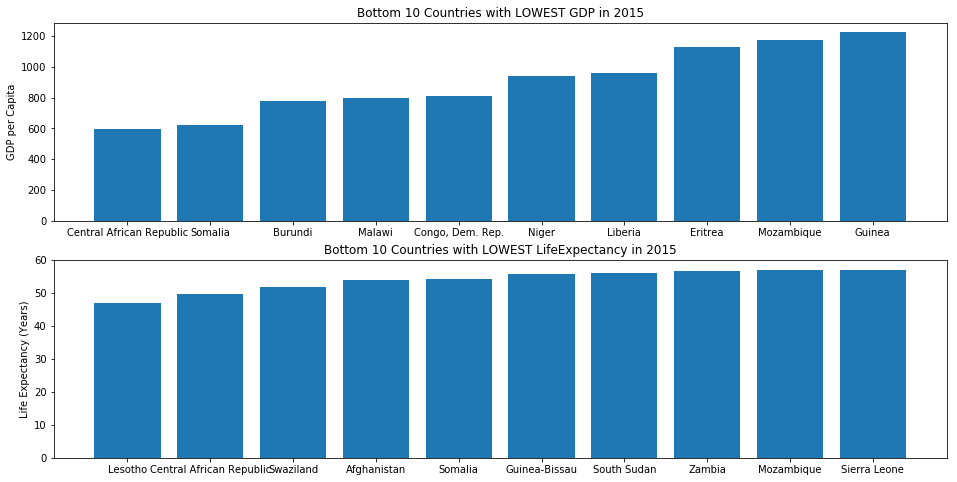

In [59]:
## Bar Plots of Top 10 countries with highest GDP and Life Expectancy in year 2015
f, axarr = plt.subplots(2,figsize=(16,8))
locations =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
countries_gdp = df_small_2015['GDP per Capita (Lowest10)']
gdp = df_small_2015['GDP(2015)']
axarr[0].bar(locations,gdp,tick_label = countries_gdp)
axarr[0].set_title('Bottom 10 Countries with LOWEST GDP in 2015')
axarr[0].set_ylabel('GDP per Capita')
countries_le = df_small_2015['Life Expectancy (Lowest10)']
le = df_small_2015['LE(2015)']
axarr[1].bar(locations,le,tick_label = countries_le)
axarr[1].set_title('Bottom 10 Countries with LOWEST LifeExpectancy in 2015')
axarr[1].set_ylabel('Life Expectancy (Years)')

We see that mostly countries in Africa make the list for the ten most **poorest** countries in terms of GDP per Capita and Life Expectancy.

<h3 align="center"> Relationship between Metrics</h3> 

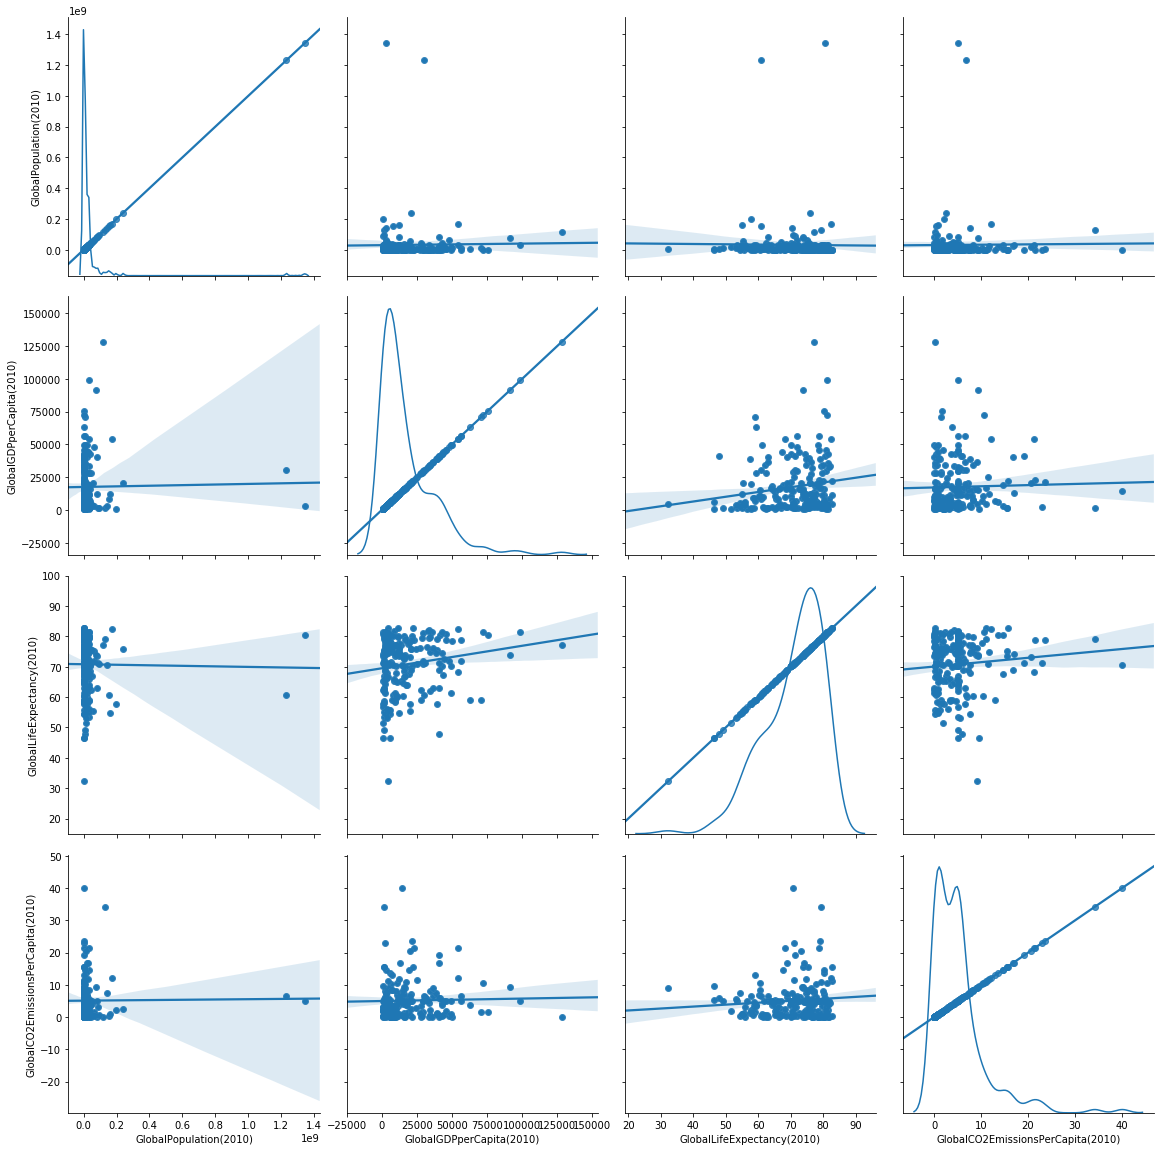

In [60]:
## Relationship between all metrics for Global Data from 2010
g = sns.pairplot(df_all_2010,palette="Set2",diag_kind="kde",size = 4)
# g.map(plt.scatter, s=50, edgecolor="white")
g.map(sns.regplot)

**Bivariate analysis (2D) on Global Data**: From a distance it appears there seems to be  some relationships between:
* Population and GDP per Capita
* GDP per Capita and Life Expectancy
* CO2 Emissions per Capita and Life Expectancy

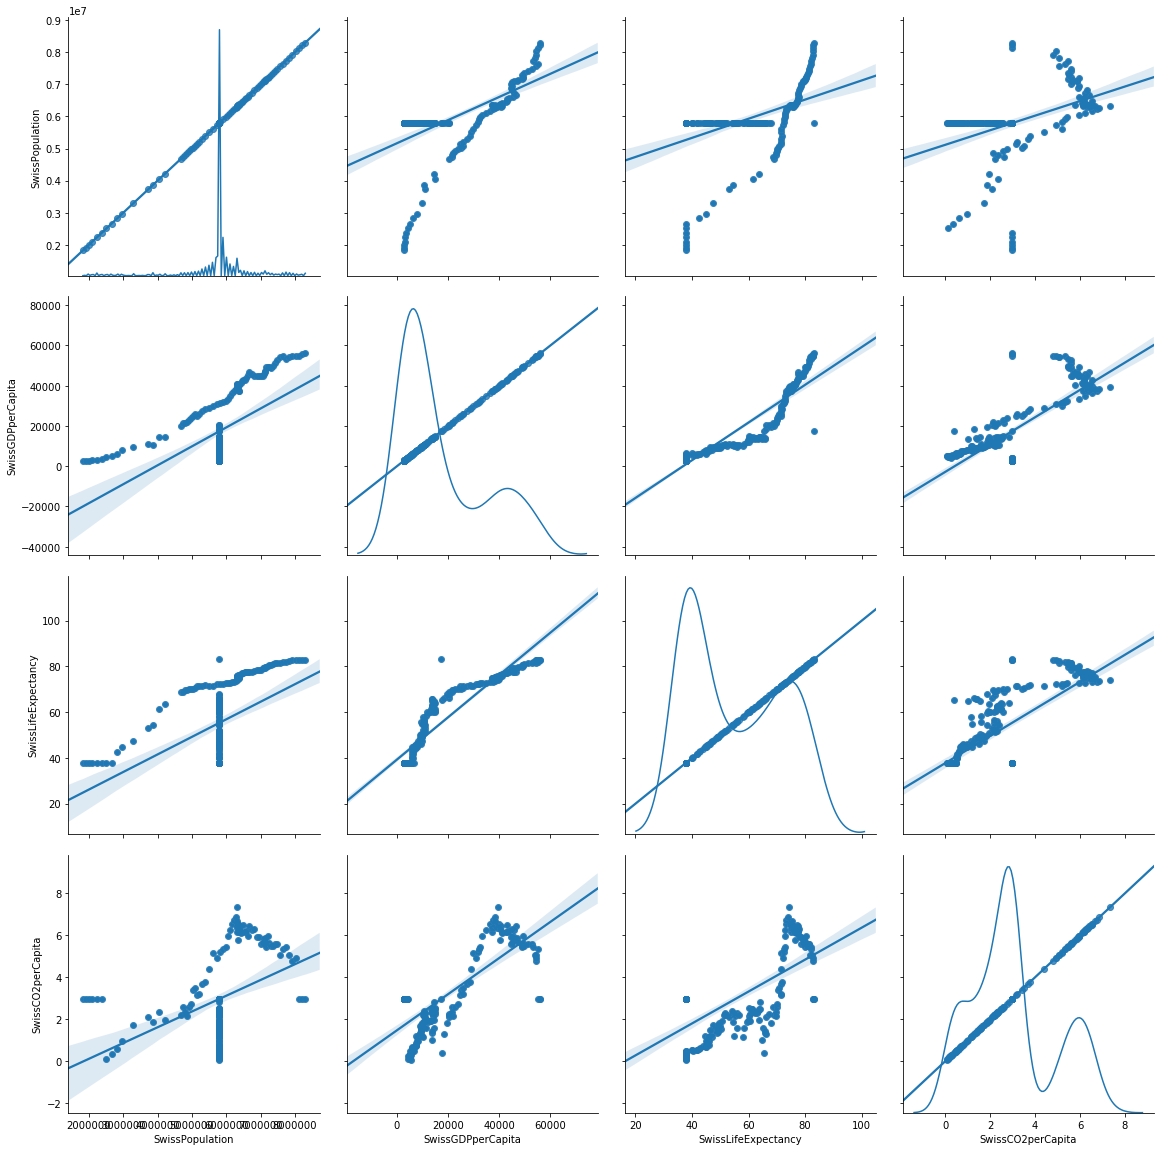

In [61]:
g = sns.pairplot(swiss_all,palette="Set2",diag_kind="kde",size = 4)
# g.map(plt.scatter, s=50, edgecolor="white")
g.map(sns.regplot)

**Bi-variate (2D) analysis on Switzerland Data**: </br>

The localized data for Switzerland seems to indicate that all four metrics seem to have a relationship (or correlated) with each other.

### Q7.)  What are the factors affecting Life Expectancy?
> **Info**: Earlier we saw that *Switzerland* was the only country appearing in the Top 10 list for both GDP per capita and Life Expectancy and other 9 countries in the GDP per Capita don't appear in the Top 10 Life Expectancy List. *This is strange, as normally one would expect people with more money to live longer having access to good health and medical facilities*. Perhaps more investigation is needed. We will use Pearson Correlation Co-efficient method to answer this question.

In [62]:
## Converting GDP and LE values for all countries in year 2015 to 1D array
gdp_2015 = list(df_gdp['2015'])
gdp_2015 = ['%.2f' % elem for elem in gdp_2015] #Reducing values after decimal point to two digits
gdp_2015 = pd.to_numeric(gdp_2015, downcast='float')

le_2015 = list(df_le['2015'])
le_2015 = ['%.2f' % elem for elem in le_2015]
le_2015 = pd.to_numeric(le_2015, downcast='float')

In [63]:
## Computing Pearson Correlation Co-efficient between Life Expectancy and GDP Per Capita for the year 2015
## For the Question: Is there any relationship between Life Expectancy and GDP per Capita in the year 2015?
corr = ss.pearsonr(gdp_2015,le_2015)
print ("Pearson Correlation Coefficient between Life Expectancy and GDP Per Capita in year 2015 is:",corr,'\n')
numpy_corr = np.corrcoef(gdp_2015,le_2015)[1,0]
print ("Correlation Coefficient using Numpy:",numpy_corr)

Pearson Correlation Coefficient between Life Expectancy and GDP Per Capita in year 2015 is: (0.17355566, 0.013741216135395902) 

Correlation Coefficient using Numpy: 0.173555642756


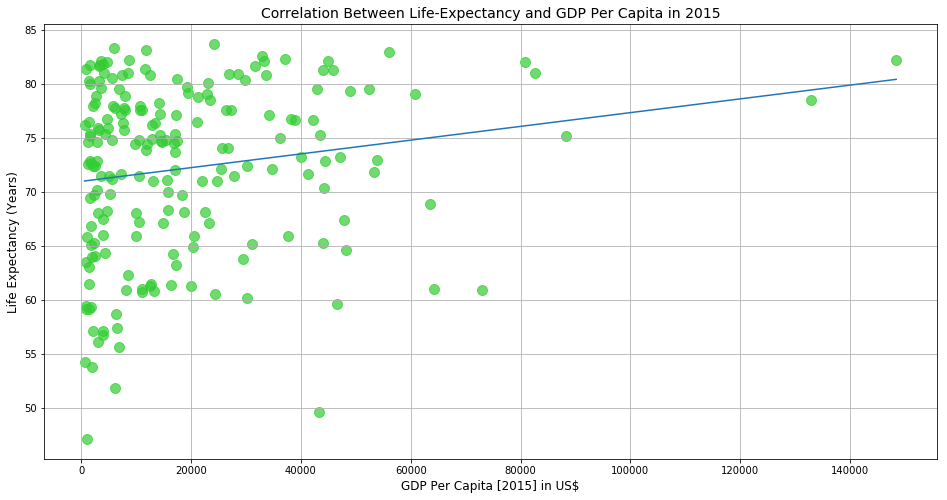

In [64]:
## Plotting Correlation Co-efficient
fig, ax2 = plt.subplots(figsize=(16,8))
ax2.scatter(gdp_2015, le_2015, c ='limegreen',s=100,alpha = 0.70)

# Plotting line of Best-Fit
ax2.plot(np.unique(gdp_2015), np.poly1d(np.polyfit(gdp_2015, le_2015, 1))(np.unique(gdp_2015)))
# Setting Title and Axis Labels
ax2.set_title('Correlation Between Life-Expectancy and GDP Per Capita in 2015',fontsize = 14)
ax2.set_xlabel('GDP Per Capita [2015] in US$',fontsize = 12)
ax2.set_ylabel('Life Expectancy (Years)',fontsize = 12)
ax2.grid(True)

In [65]:
## Computing Pearson Correlation Co-efficient between Life Expectancy and GDP Per Capita for the year 2010
corr = ss.pearsonr(gdp_2010,le_2010)
numpy_corr = np.corrcoef(gdp_2010,le_2010)[1,0]
print ("Correlation Coefficient between Global Life Expectancy and GDP per Capita for 2010:",numpy_corr)

Correlation Coefficient between Global Life Expectancy and GDP per Capita for 2010: 0.163958237476


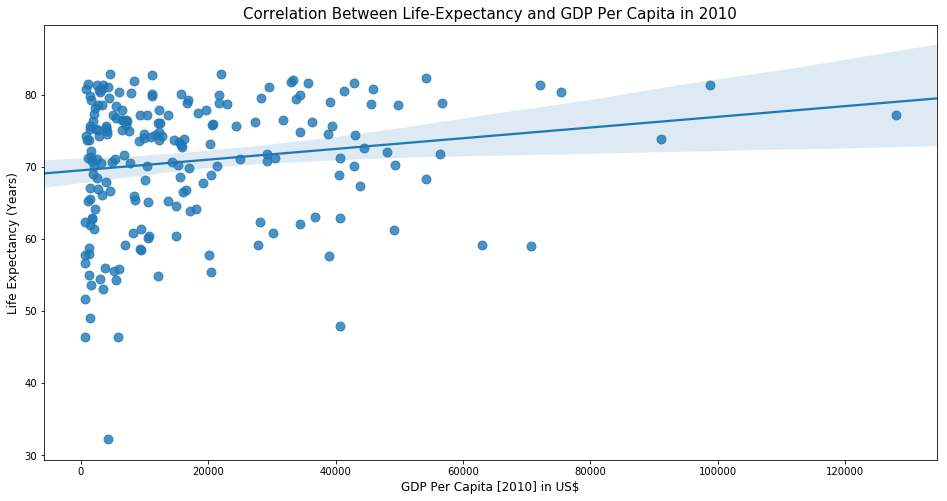

In [66]:
## Plotting Correlation Co-efficient for 2010 data using Seaborn
fig = plt.figure(figsize=(16,8))
sns.regplot(x='GlobalGDPperCapita(2010)',y='GlobalLifeExpectancy(2010)',data = df_all_2010,fit_reg=True,scatter_kws={'s':80});
# sns.regplot(x=gdp_2015,y=le_2015,fit_reg=True,scatter_kws={'s':80});
plt.xlabel('GDP Per Capita [2010] in US$',fontsize = 12);
plt.ylabel('Life Expectancy (Years)',fontsize = 12);
plt.title('Correlation Between Life-Expectancy and GDP Per Capita in 2010',fontsize = 15);
plt.show()

**Note**:
Correlation between Global Life Expectancy and GDP Per Capita for both 2010 and 2015 data seems to be relatively the same.</br>

_Pearson correlation coefficient_ showed a minor increase to 0.17 (in 2015) compared to 0.16 (in 2010)

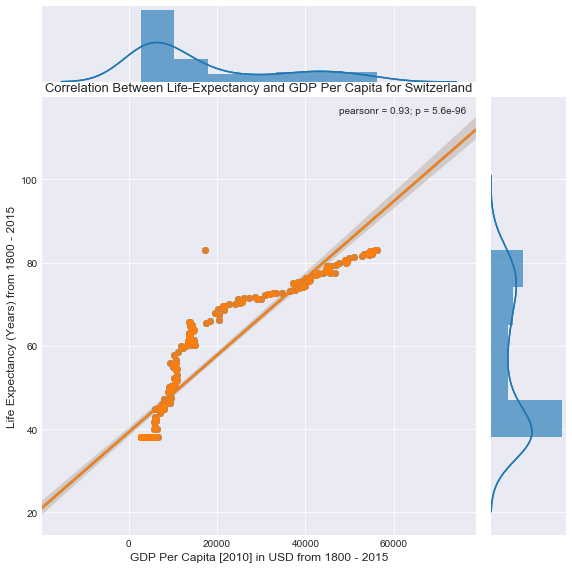

In [67]:
# Inspecting relationship between GDP per Capita and Life Expectancy for Switzerland
sns.set_style("darkgrid")
g = sns.jointplot("SwissGDPperCapita","SwissLifeExpectancy",data=swiss_all, kind="reg",size = 8)
g.plot(sns.regplot, sns.distplot)
plt.xlabel('GDP Per Capita [2010] in USD from 1800 - 2015',fontsize = 12);
plt.ylabel('Life Expectancy (Years) from 1800 - 2015',fontsize = 12);
plt.title('Correlation Between Life-Expectancy and GDP Per Capita for Switzerland',fontsize = 13);
plt.show()

*Pearson Corr. Co-efficient* = **0.1735** (for Global Data in 2015) and **0.93** (Localized Data - Switzerland) and the line of best-fit in the above plots, indicates that there is a _linear positive correlation_ between **Life Expectancy** and **GDP Per Capita** in general. However since the value is > 0 but < 0.25 (for global data) we can conclude that there is only a weak relationship.

> **Moral:** 
  *Money is not the only key to happiness and longevity, there may be other factors that are at play in poor countries with low GDP that is not present in rich countries.*

<h3 align="center">Life Expectancy vs. Per capita CO2 Emissions</h3> 

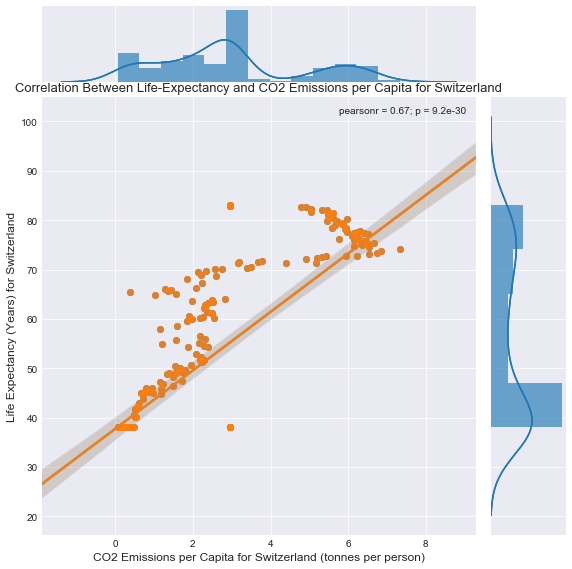

In [68]:
# Inspecting relationship between CO2perCapita and Life Expectancy for Switzerland
g = sns.jointplot("SwissCO2perCapita","SwissLifeExpectancy",data=swiss_all, kind="reg",size = 8)
g.plot(sns.regplot, sns.distplot)
plt.xlabel('CO2 Emissions per Capita for Switzerland (tonnes per person)',fontsize = 12);
plt.ylabel('Life Expectancy (Years) for Switzerland',fontsize = 12);
plt.title('Correlation Between Life-Expectancy and CO2 Emissions per Capita for Switzerland',fontsize = 13);
plt.show()

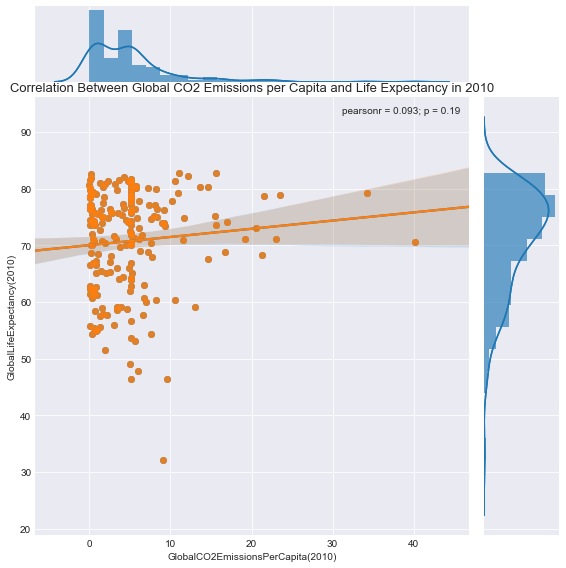

In [69]:
# Inspecting Relationship between Global PerCapita CO2 Emissions and Life Expectancy for 2010 data
g = sns.jointplot("GlobalCO2EmissionsPerCapita(2010)","GlobalLifeExpectancy(2010)",data=df_all_2010, kind="reg",size = 8)
g.plot(sns.regplot, sns.distplot)
plt.title('Correlation Between Global CO2 Emissions per Capita and Life Expectancy in 2010',fontsize = 13);
plt.show()

Pearson Correlation Co-efficient of 0.67 (for Switzerland) and 0.093 (for Global data) seems to suggest that is indeed a mild relationship between CO2 Emissions per Capita and Life Expectancy. Because air pollution varies from region to region the correlation appears to be diluted at the global level. _It may generally be expected that increasing CO2 levels (Air pollution) may impact Life Expectancy in that region adversely_ but our data may be insufficient to come to that conclusion.

<h3 align="center">Global Population Vs. Life Expectancy</h3> 

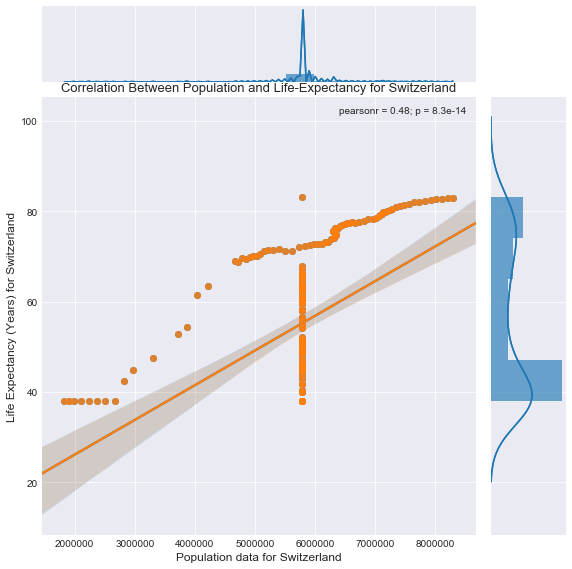

In [70]:
# Inspecting relationship between Population and Life Expectancy for Switzerland
g = sns.jointplot("SwissPopulation","SwissLifeExpectancy",data=swiss_all, kind="reg",size = 8)
g.plot(sns.regplot, sns.distplot)
plt.xlabel('Population data for Switzerland',fontsize = 12);
plt.ylabel('Life Expectancy (Years) for Switzerland',fontsize = 12);
plt.title('Correlation Between Population and Life-Expectancy for Switzerland',fontsize = 13);
plt.show()

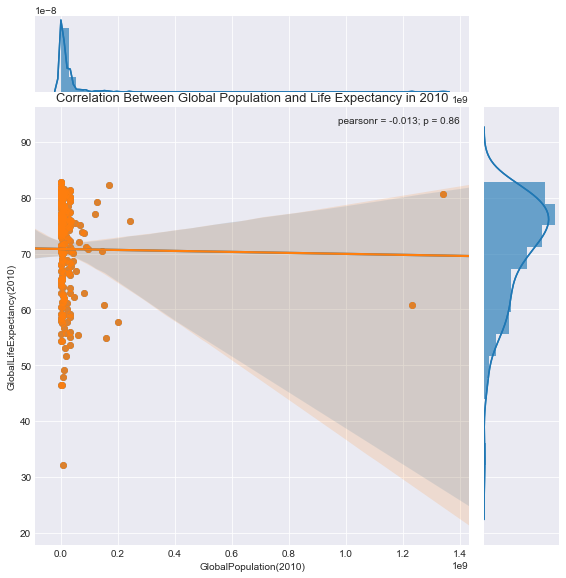

In [71]:
# Inspecting Relationship between Global Population and Life Expectancy
g = sns.jointplot("GlobalPopulation(2010)","GlobalLifeExpectancy(2010)",data=df_all_2010, kind="reg",size = 8)
g.plot(sns.regplot, sns.distplot)
plt.title('Correlation Between Global Population and Life Expectancy in 2010',fontsize = 13);
plt.show()

Looking at the Pearson Correlation Co-efficient of 0.48 (for Switzerland) and -0.013 (for Global data) it is difficult to come to come to any conclusion. One may expect that increasing population may constrain national and individual resources in a particular region, _thus decreasing individual life expectancy_ **but our data may be insufficient to come to that conclusion**.

### Q8.)   What are the factors affecting GDP Per Capita?
> **Info**: Here we will see if GDP per Capita is affected by Population Growth and CO2 Emissions per Capita, both globally and locally!

<h3 align="center">CO2 Emissions vs. GDP per Capita</h3> 

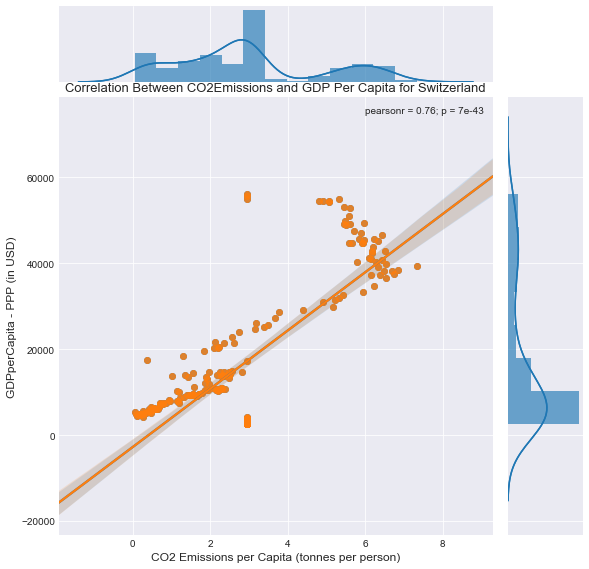

In [72]:
# Inspecting Relationship between CO2 Emissions and GDP per Capita for Switzerland
g = sns.jointplot("SwissCO2perCapita","SwissGDPperCapita",data=swiss_all, kind="reg",size = 8)
g.plot(sns.regplot, sns.distplot)
plt.xlabel('CO2 Emissions per Capita (tonnes per person)',fontsize = 12);
plt.ylabel('GDPperCapita - PPP (in USD)',fontsize = 12);
plt.title('Correlation Between CO2Emissions and GDP Per Capita for Switzerland',fontsize = 13);
plt.show()

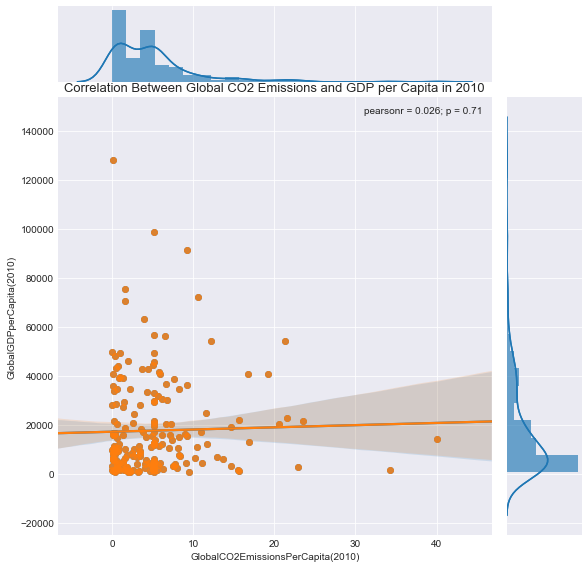

In [73]:
# Inspecting Relationship between Global CO2 Emissions and GDP per Capita for 2010
g = sns.jointplot("GlobalCO2EmissionsPerCapita(2010)","GlobalGDPperCapita(2010)",data=df_all_2010, kind="reg",size = 8)
g.plot(sns.regplot, sns.distplot)
plt.title('Correlation Between Global CO2 Emissions and GDP per Capita in 2010',fontsize = 13);
plt.show()

Looking at the Pearson Correlation Co-efficient of 0.76 (for Switzerland) and 0.026 (for Global data) we can conclude that there is a minor positive correlation between CO2 Emissions and GDP per Capita. _With increased drive for economic growth human beings generally seem to cause more pollution_. However since we dont have CO2 Emissions data for 2015 we cannot arrive at a strong conclusion for this particular comparision.
<h3 align="center">Population Growth Vs. GDP per Capita</h3> 

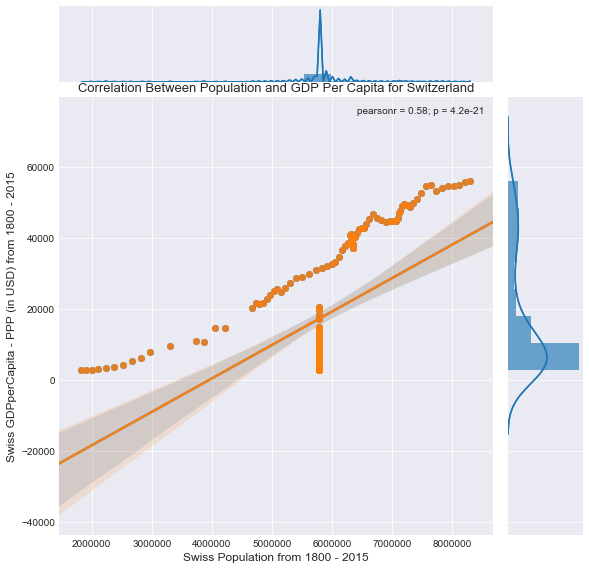

In [74]:
# Inspecting Relationship between Population and GDP per Capita for Switzerland
g = sns.jointplot("SwissPopulation","SwissGDPperCapita",data=swiss_all, kind="reg",size = 8)
g.plot(sns.regplot, sns.distplot)
plt.xlabel('Swiss Population from 1800 - 2015',fontsize = 12);
plt.ylabel('Swiss GDPperCapita - PPP (in USD) from 1800 - 2015',fontsize = 12);
plt.title('Correlation Between Population and GDP Per Capita for Switzerland',fontsize = 13);
plt.show()

Looking at the Pearson Correlation co-efficient = 0.58 (for Switzerland) it seems to indicate that GDP per Capita seems to be positively impacted by the regional population growth. _With more people in a country there is a  possibility for more contribution towards individual, organizational and national economic growth_ which can be concluded by this trend.

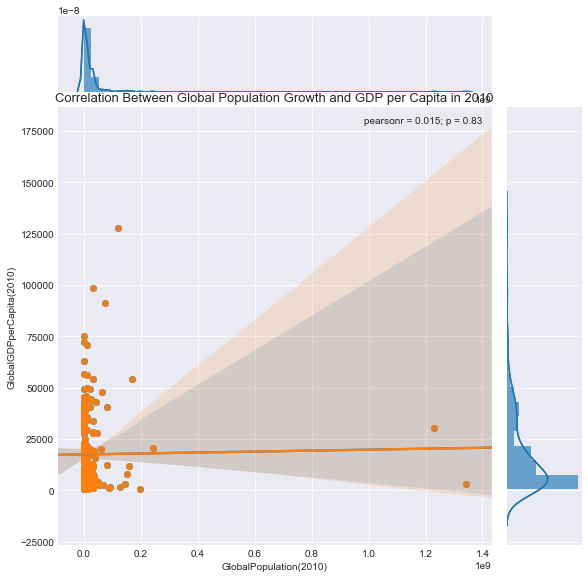

In [75]:
# Inspecting Relationship between Global Population and GDP per Capita for 2010
g = sns.jointplot("GlobalPopulation(2010)","GlobalGDPperCapita(2010)",data=df_all_2010, kind="reg",size = 8)
g.plot(sns.regplot, sns.distplot)
plt.title('Correlation Between Global Population Growth and GDP per Capita in 2010',fontsize = 13);
plt.show()

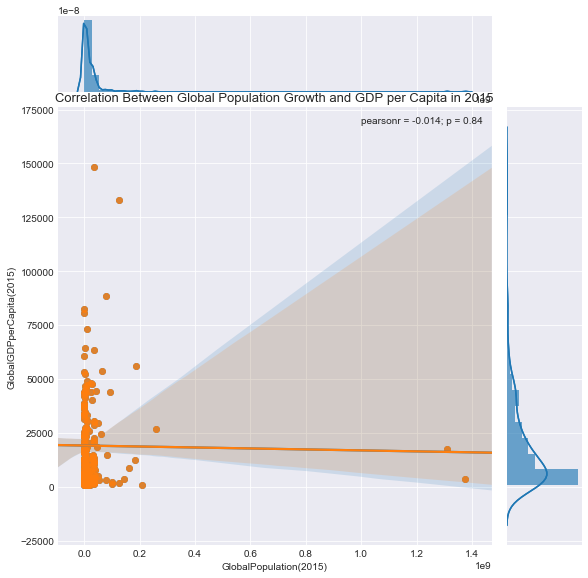

In [76]:
# Inspecting Relationship between Global Population and GDP per Capita for 2015
g = sns.jointplot("GlobalPopulation(2015)","GlobalGDPperCapita(2015)",data=df_all_2015, kind="reg",size = 8)
g.plot(sns.regplot, sns.distplot)
plt.title('Correlation Between Global Population Growth and GDP per Capita in 2015',fontsize = 13);
plt.show()

Looking at the Pearson Correlation co-efficient = 0.015 and -0.014 (for 2010 and 2015 Global Data) we see only a _weak correlation_ from what we saw with the Swiss data for Population vs. GDPperCapita. One possible explanation might be that _Wealth, economic growth and prosperity is very unevenly distributed in different places on the planet._ 

<a id='conclusions'></a>
## Conclusions

#### Potential Problems with the Investigation:
* CO2 Emissions dataset was not present for the year 2015, so latest trends could not investigated
* GDP Metrics for many countries may be inaccurate, many countries may have a parallel economy which is not accounted for with mainstream banking transactions. (eg: India)
* Missing NaN values in the *Global* datasets were filled with the mean values of the column, this normalization might have impacted the dataset giving us weak correlation.
* More advanced statistical tests, other correlation estimation techniques and extensive data acquisition for countries with missing values could give us more insightful results.